In [1]:
import pandas as pd
import boto3
import json

report_df = pd.read_csv("cccmaker_y1q1-y1q3.csv")
report_df.head()

,Created,College,Reporting Quarter,Outcome,Submission By,Activities,Success
0,05/09/18 7:20 PM,American River College,Q3 Mar 31 2018,Internships,Randy Schuster,The Design hub offers over 70 real word projec...,ARC Design Hub is actively working with the Ca...
1,05/02/18 11:57 AM,Foothill College,Q3 Mar 31 2018,Internships,brumbaugh@krauseinnovationcenter.org,We have been doing outreach for additional int...,We completed our first MakerCamp during the 3r...
2,04/25/18 12:06 AM,Butte College,Q3 Mar 31 2018,Internships,donnellyda@butte.edu,Due to our college not wanting to sign the Cat...,We have not been able to do internships yet.\n...
3,04/25/18 12:04 AM,Butte College,Q3 Mar 31 2018,Internships,donnellyda@butte.edu,Due to our college not wanting to sign the Cat...,We have not been able to do internships yet.\n...
4,04/25/18 12:03 AM,Butte College,Q3 Mar 31 2018,Internships,donnellyda@butte.edu,Due to our college not wanting to sign the Cat...,We have not been able to do internships yet.\n...


In [2]:
report_df.isnull().sum()

Created              0
College              0
Reporting Quarter    0
Outcome              0
Submission By        0
Activities           0
Success              5
dtype: int64

In [3]:
report_df['Success'].fillna('-', inplace = True)

In [4]:
client = boto3.client('comprehend')
comprehend_type =['PERSON','LOCATION','ORGANIZATION','COMMERCIAL_ITEM','EVENT','DATE','QUANTITY','TITLE','OTHER']

In [5]:
response = client.detect_entities(Text =report_df['Success'][0], LanguageCode = 'en')
print (report_df['Success'][0])
print (json.dumps(response, indent=4, sort_keys=True))

ARC Design Hub is actively working with the Career Catalyst system to meet our goal of 9 internships and will have all 9 on-boarded and completed with 20 hours by May 15th.

In addition are working with Harmonylegal.com to provide 3 interns for full time work over the summer ... with full time options in the Fall

We are also working with Almendariz Consulting to provide a work environment for a disabled student who is being considered for contract work in the future.  We hope to develop a working process and deliverable history to encourage this opportunity for contract work.

The Design Hub provided 2 interns for external work to Sacramento Sanitary District ... one of which has been converted to full time contract work.  In addition, 2 interns have been hired by Northern States Building Industries Association for work through the Fall semester with an option for additional employment in the spring.

In week 8 of the semester, we lost two of our production students to full time work 

In [ ]:
response = client.detect_key_phrases(Text =report_df['Success'][0], LanguageCode = 'en')
print (json.dumps(response, indent=4, sort_keys=True))

In [ ]:
response = client.detect_sentiment(Text =report_df['Success'][0], LanguageCode = 'en')
print (json.dumps(response, indent=4, sort_keys=True))

In [9]:
def adding_entity(entity, text, entities):
    if entity not in entities:
        entities[entity] = [text]
    else:
        entities[entity].append(text)
    return entities

In [10]:
def get_entities(text):
    entities = {}
    client = boto3.client('comprehend')
    response = client.detect_entities(Text =text, LanguageCode = 'en')
    for entity in response['Entities']:
        adding_entity(entity['Type'], entity['Text'], entities)
    return entities

In [15]:
entities = get_entities(report_df['Success'][0])
print(entities)

{'ORGANIZATION': ['ARC Design Hub', 'Almendariz Consulting', 'Design Hub', 'Northern States Building Industries Association', 'HoneyDew Architects', 'Granite Construction', 'Design Hub', 'FAA', 'DroneBase', 'Design Hub', 'Design Hub', 'Amazon', 'Design Hub', 'Berkeley National Labs'], 'QUANTITY': ['9 internships', '9', '20 hours', '3 interns', '2 interns', 'one', '2 interns', '8', 'two', '2 of our participants', '3', '4 times per work', '2', 'one', '6 landscape architecture students', '3', '8 weeks', '2 students', '14 students'], 'DATE': ['May 15th'], 'OTHER': ['Harmonylegal.com'], 'LOCATION': ['Sacramento Sanitary District', 'East Coast'], 'PERSON': ['Melissa Fish']}


In [16]:
entities_count = {}
for comprehend_type in entities.items():
    entities_count[comprehend_type[0]] = len(comprehend_type[1])
print (entities_count)

{'ORGANIZATION': 14, 'QUANTITY': 19, 'DATE': 1, 'OTHER': 1, 'LOCATION': 2, 'PERSON': 1}


In [17]:
sum(entities_count.values())

38

In [25]:
report_df['Activities Entities']=report_df['Activities'].apply(get_entities)

In [28]:
report_df['Activities Entities'][23]

{'DATE': ['21st century',
  'next month',
  'May',
  'June',
  'mid-May',
  'late-May',
  'June'],
 'ORGANIZATION': ['LinkedIN', 'FCCC', 'FCCC', 'FCCC'],
 'OTHER': ['Q3', 'Q4', 'Q4/Annual CCC-Maker'],
 'QUANTITY': ['up to 5 hours',
  '26 students',
  '26',
  '17',
  '9 students',
  '9',
  '12 students',
  'approximately 37',
  '37 interns',
  '16']}

In [29]:
def get_entities_count(entities):
    entities_count = {}
    for comprehend_type in entities.items():
        entities_count[comprehend_type[0]] = len(comprehend_type[1])
    return entities_count

In [31]:
report_df['Activities Entity Count']=report_df['Activities Entities'].apply(get_entities_count)

In [35]:
def sum_entities(entity_count):
    return sum(entity_count.values())

In [36]:
report_df['Activities Entity Total']=report_df['Activities Entity Count'].apply(sum_entities)

In [38]:
report_df.tail()

,Created,College,Reporting Quarter,Outcome,Submission By,Activities,Success,Activities Entities,Activities Entity Count,Activities Entity Total
286,01/19/18 1:15 PM,Sierra College,Q2 Dec 31 2017,Curriculum,dominic@sierramakerspaces.com,More than 30 faculty members attended skills-b...,Sierra Makerspaces' Faculty Maker in Residence...,"{'QUANTITY': ['More than 30 faculty members'],...","{'QUANTITY': 1, 'ORGANIZATION': 1}",2
287,10/31/17 4:28 PM,Sierra College,Q1 Sept 30 2017,Curriculum,dominic@sierramakerspaces.com,A faculty maker in residence was hired to assi...,The faculty maker in residence hosted a flex e...,"{'QUANTITY': ['17 faculty members'], 'ORGANIZA...","{'QUANTITY': 1, 'ORGANIZATION': 2}",3
288,04/05/18 9:02 AM,Woodland Community College,Q3 Mar 31 2018,Curriculum,iiatridi@yccd.edu,There are several instructors which have expre...,There are current efforts among interdisciplin...,{'ORGANIZATION': ['Summer High School Entrepre...,"{'ORGANIZATION': 9, 'OTHER': 1}",10
289,01/08/18 10:57 AM,Woodland Community College,Q2 Dec 31 2017,Curriculum,iiatridi@yccd.edu,The core team hosted and invitation to partici...,There are current efforts among interdisciplin...,"{'DATE': ['November 21st'], 'QUANTITY': ['Two ...","{'DATE': 1, 'QUANTITY': 1, 'PERSON': 2, 'ORGAN...",7
290,10/30/17 3:31 PM,Woodland Community College,Q1 Sept 30 2017,Curriculum,iiatridi@yccd.edu,The Makerspace faculty core team is hosting a ...,The are current efforts among interdisciplinar...,"{'ORGANIZATION': ['Makerspace', 'Makerspace', ...","{'ORGANIZATION': 5, 'DATE': 1, 'PERSON': 2}",8


In [39]:
report_df['Success Entities']=report_df['Success'].apply(get_entities)

In [40]:
report_df['Success Entity Count']=report_df['Success Entities'].apply(get_entities_count)

In [41]:
report_df['Success Entity Total']=report_df['Success Entity Count'].apply(sum_entities)

In [42]:
report_df.tail()

,Created,College,Reporting Quarter,Outcome,Submission By,Activities,Success,Activities Entities,Activities Entity Count,Activities Entity Total,Success Entities,Success Entity Count,Success Entity Total
286,01/19/18 1:15 PM,Sierra College,Q2 Dec 31 2017,Curriculum,dominic@sierramakerspaces.com,More than 30 faculty members attended skills-b...,Sierra Makerspaces' Faculty Maker in Residence...,"{'QUANTITY': ['More than 30 faculty members'],...","{'QUANTITY': 1, 'ORGANIZATION': 1}",2,"{'ORGANIZATION': ['Sierra Makerspaces'], 'PERS...","{'ORGANIZATION': 1, 'PERSON': 1, 'QUANTITY': 7...",12
287,10/31/17 4:28 PM,Sierra College,Q1 Sept 30 2017,Curriculum,dominic@sierramakerspaces.com,A faculty maker in residence was hired to assi...,The faculty maker in residence hosted a flex e...,"{'QUANTITY': ['17 faculty members'], 'ORGANIZA...","{'QUANTITY': 1, 'ORGANIZATION': 2}",3,"{'QUANTITY': ['one', 'one']}",{'QUANTITY': 2},2
288,04/05/18 9:02 AM,Woodland Community College,Q3 Mar 31 2018,Curriculum,iiatridi@yccd.edu,There are several instructors which have expre...,There are current efforts among interdisciplin...,{'ORGANIZATION': ['Summer High School Entrepre...,"{'ORGANIZATION': 9, 'OTHER': 1}",10,"{'QUANTITY': ['One', 'third collaboration'], '...","{'QUANTITY': 2, 'OTHER': 2}",4
289,01/08/18 10:57 AM,Woodland Community College,Q2 Dec 31 2017,Curriculum,iiatridi@yccd.edu,The core team hosted and invitation to partici...,There are current efforts among interdisciplin...,"{'DATE': ['November 21st'], 'QUANTITY': ['Two ...","{'DATE': 1, 'QUANTITY': 1, 'PERSON': 2, 'ORGAN...",7,"{'QUANTITY': ['One', 'third collaboration'], '...","{'QUANTITY': 2, 'OTHER': 2}",4
290,10/30/17 3:31 PM,Woodland Community College,Q1 Sept 30 2017,Curriculum,iiatridi@yccd.edu,The Makerspace faculty core team is hosting a ...,The are current efforts among interdisciplinar...,"{'ORGANIZATION': ['Makerspace', 'Makerspace', ...","{'ORGANIZATION': 5, 'DATE': 1, 'PERSON': 2}",8,"{'QUANTITY': ['One', 'one'], 'OTHER': ['Englis...","{'QUANTITY': 2, 'OTHER': 1}",3


In [43]:
report_df['Activities Entity Total'].describe()

count    291.000000
mean      13.374570
std       13.512723
min        0.000000
25%        4.000000
50%        9.000000
75%       18.000000
max       74.000000
Name: Activities Entity Total, dtype: float64

In [44]:
report_df['Success Entity Total'].describe()

count    291.000000
mean       6.326460
std        7.638375
min        0.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: Success Entity Total, dtype: float64

In [45]:
grouped_quarter_activities_total = report_df['Activities Entity Total'].groupby(report_df['Reporting Quarter'])

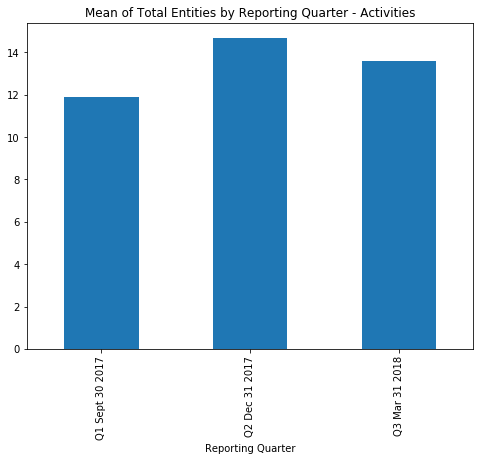

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
data = grouped_quarter_activities_total.mean()
data.plot.bar(title='Mean of Total Entities by Reporting Quarter - Activities', figsize=(8,6))

In [47]:
grouped_quarter_success_total = report_df['Success Entity Total'].groupby(report_df['Reporting Quarter'])

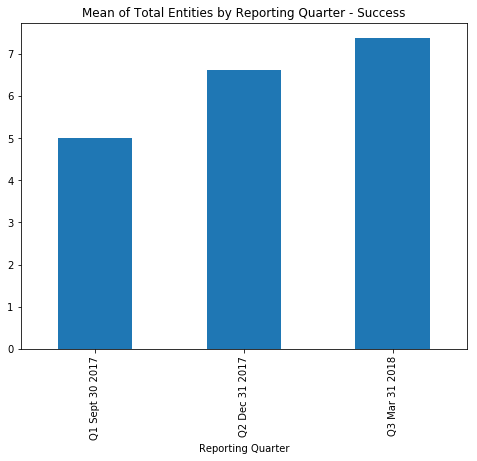

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
data = grouped_quarter_success_total.mean()
data.plot.bar(title='Mean of Total Entities by Reporting Quarter - Success', figsize=(8,6))

In [77]:
def all_entities(reponse, entity, words):
    for keys, values in response.items():
        if keys == entity:
            for value in values:
                words = words + ' ' + value
    #print (len(words))
    return words

In [55]:
words = ''
for entity in report_df['Activities Entities'][0]['ORGANIZATION']:
    words = words + ' ' + entity
print (words)

 Design Hub CCC Maker PBL


In [78]:
entity = 'ORGANIZATION'
words = ''
for response in report_df['Activities Entities']:
    words = all_entities(response, entity, words)
    words = words + ' '
print(words)

 Design Hub CCC Maker PBL  Castilleja Schoolﾒs Bourne Lab Sacred Heart Schoolﾒs Dream Lab St. Raymond School Mechatronics Program Sunnyvale Public Library LearningTech YMCA Boys and Girls Clubs Boys and Girls Clubs  Catalyst  Catalyst  Catalyst   State Foundation and Career Catalyst GWC GWC  NWoW LinkedIn  Makerspace Moorpark College Makerspace Makerspace Southern California CCC Maker Symposium Makerspace   Chaffey College Chaffey College InTech Center CCC  STEAM Brinkﾒs Awards Google Goodwill Central Coast Job Goodwill Central Coast Job Developer Foundation for California Community Colleges  GoFab Paycom OCC  FabLab Kapor Center for Social Impact Kaporﾒs IDEO  San Mateo Chamber of Commerce   CCSF CCSF CNC Plethora CCSF Architecture Pagoda Arts CCSF Office of Work Experience CCSF OWE FCCC FCCC FCCC MakerSPHERE CCC FCCC  Sacramento City Collegeﾒs Makerspace CCC Maker   Charypot Glendale City Libraries Glendale Libraries GCC Maker Space  Moreno Valley College MVC  Hartnell College Hartne

In [79]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
nsw = ['-', 'will', 'new', 'makerspce', 'college'] 
for i in nsw:
    stopwords.add(i)

In [80]:
 wordcloud = WordCloud(font_path=None, width=600, height=300, margin=2, prefer_horizontal=0.9, \
                       scale=1, min_font_size=2, relative_scaling=1, stopwords=stopwords, background_color="white")

In [81]:
wordcloud.generate(words)

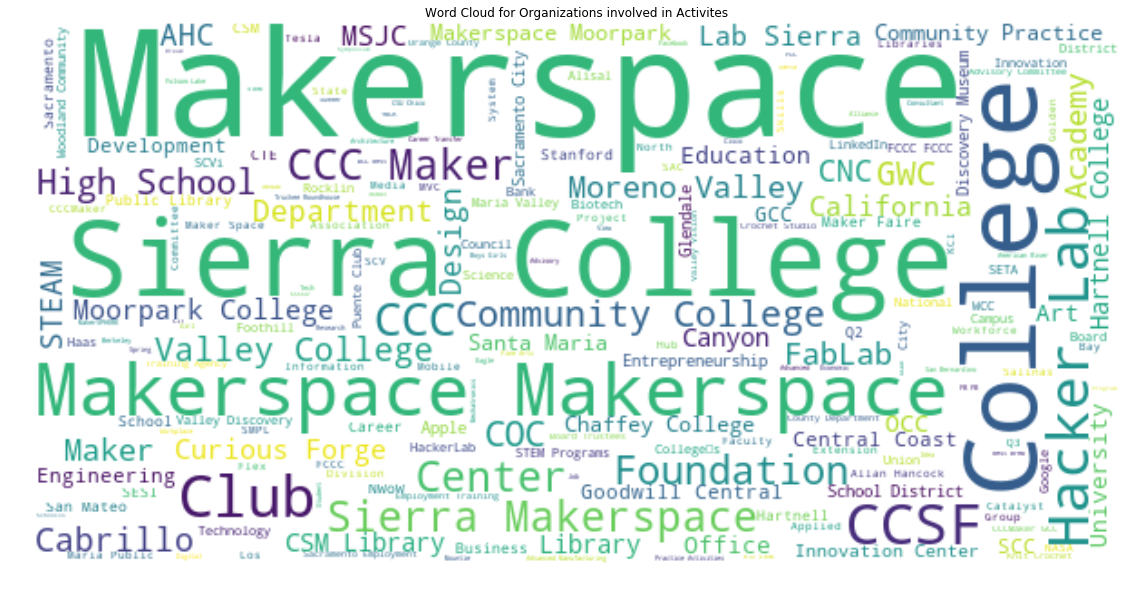

In [82]:
plt.figure( figsize=(20,10) )
plt.title("Word Cloud for Organizations involved in Activites")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

To Do:
Get all the organizations, items, events, persons
Count of organizations, events, person